In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

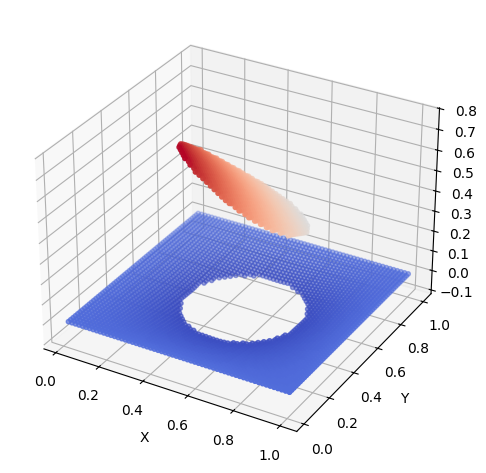

In [50]:
with h5py.File("data.hdf", "r") as f:
    phi = f["VTKHDF/CellData/phi"][:]
nx, ny = phi.shape[1], phi.shape[2]
dx, dy = 1 / nx, 1 / ny
x = np.arange(dx, 1 + dx, dx)
y = np.arange(dy, 1 + dy, dy)
Y, X = np.meshgrid(y, x)
Z = phi[-1, :, :]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
scatter = ax.scatter(X, Y, Z, c=Z, cmap="coolwarm", s=10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()

In [ ]:
u = np.exp(-(X**2) - Y**2)
u[(X - 0.5) ** 2 + (Y - 0.5) ** 2 > 0.25**2] = 0

(168,)